<a href="https://colab.research.google.com/github/JayCh0711/Data_Science_Projects/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pickle

Data Loading and Understanding

In [ ]:
df = pd.read_csv('/content/CustomerChurn.csv')

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.head()

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,326527,3668-QPYBK,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,845894,7795-CFOCW,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,503388,9237-HQITU,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
df.head(2)

,LoyaltyID,Customer ID,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,318537,7590-VHVEG,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,152148,5575-GNVDE,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   LoyaltyID          7043 non-null   int64  
 1   Customer ID        7043 non-null   object 
 2   Senior Citizen     7043 non-null   object 
 3   Partner            7043 non-null   object 
 4   Dependents         7043 non-null   object 
 5   Tenure             7043 non-null   int64  
 6   Phone Service      7043 non-null   object 
 7   Multiple Lines     7043 non-null   object 
 8   Internet Service   7043 non-null   object 
 9   Online Security    7043 non-null   object 
 10  Online Backup      7043 non-null   object 
 11  Device Protection  7043 non-null   object 
 12  Tech Support       7043 non-null   object 
 13  Streaming TV       7043 non-null   object 
 14  Streaming Movies   7043 non-null   object 
 15  Contract           7043 non-null   object 
 16  Paperless Billing  7043 

In [ ]:
#dropping the loyalty id and customer id as these are not required for modeling
df = df.drop(columns=['LoyaltyID','Customer ID'])

In [ ]:
df.head(2)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [ ]:
df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [ ]:
print(df['Senior Citizen'].unique())
print(df['Partner'].unique())
print(df['Dependents'].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']


In [ ]:
#Printing the unique values in all the columns

numerical_features_list = ['Tenure Months', 'Monthly Charges', 'Total Charges']
categorical_features_list = ['Gender', 'Senior Citizen', 'Partner', 'Dependents']

for col in df.columns:
  if col in numerical_features_list:
    print(f'{col}: {df[col].unique()}')
    print('-'*50)

Monthly Charges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
--------------------------------------------------
Total Charges: ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
--------------------------------------------------


In [ ]:
print(df.isnull().sum())

Senior Citizen       0
Partner              0
Dependents           0
Tenure               0
Phone Service        0
Multiple Lines       0
Internet Service     0
Online Security      0
Online Backup        0
Device Protection    0
Tech Support         0
Streaming TV         0
Streaming Movies     0
Contract             0
Paperless Billing    0
Payment Method       0
Monthly Charges      0
Total Charges        0
Churn                0
dtype: int64


In [ ]:
df[df['Total Charges']==' ']

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
488,No,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,No,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,No,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,No,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,No,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,No,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,No,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
len(df[df['Total Charges']==' '])

11

In [ ]:
df['Total Charges'] = df['Total Charges'].replace({' ': '0.0'})

In [ ]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Partner            7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   Tenure             7043 non-null   int64  
 4   Phone Service      7043 non-null   object 
 5   Multiple Lines     7043 non-null   object 
 6   Internet Service   7043 non-null   object 
 7   Online Security    7043 non-null   object 
 8   Online Backup      7043 non-null   object 
 9   Device Protection  7043 non-null   object 
 10  Tech Support       7043 non-null   object 
 11  Streaming TV       7043 non-null   object 
 12  Streaming Movies   7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

In [ ]:
#checking the class distribution of target column
print(df['Churn'].value_counts())

Churn
No     5174
Yes    1869
Name: count, dtype: int64


Class Imbalanced identified

EDA

In [ ]:
df.shape

(7043, 19)

In [ ]:
df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [ ]:
df.describe()

,Tenure,Monthly Charges,Total Charges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Numerical Features Analysis

In [ ]:
def plot_histogram(df, column_name):
  plt.figure(figsize=(5,3))
  sns.histplot(df[column_name], kde=True)
  plt.title(f'Distribution of {column_name}')

  #Calculate the mean and median values for the columns
  mean_value = df[column_name].mean()
  median_value = df[column_name].median()

  #Add vertical lines for mean and median
  plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=1, label=f'Mean: {mean_value:.2f}')
  plt.axvline(median_value, color='green', linestyle='dashed', linewidth=1, label=f'Median: {median_value:.2f}')

  plt.legend()

  plt.show()

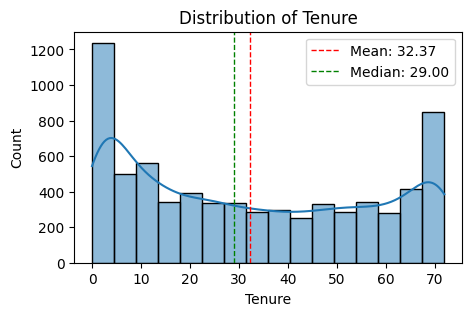

In [ ]:
plot_histogram(df, 'Tenure')

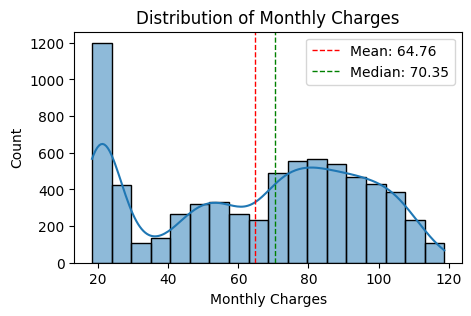

In [ ]:
plot_histogram(df, 'Monthly Charges')

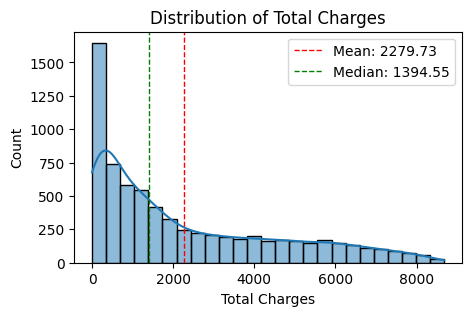

In [ ]:
plot_histogram(df, 'Total Charges')

Box Plot for Numerical Features

In [ ]:
def plot_boxplot(df, column_name):
  plt.figure(figsize=(5,3))
  sns.boxplot(y=df[column_name])
  plt.title(f'Distribution of {column_name}')
  plt.ylabel(column_name)
  plt.show()

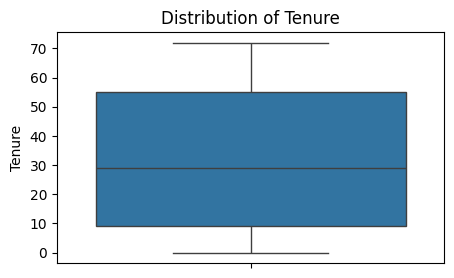

In [ ]:
plot_boxplot(df, 'Tenure')

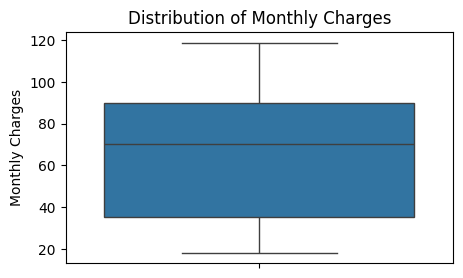

In [ ]:
plot_boxplot(df, 'Monthly Charges')

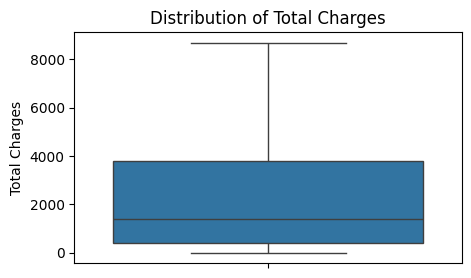

In [ ]:
plot_boxplot(df, 'Total Charges')

Correlation Heatmap for numerical columns

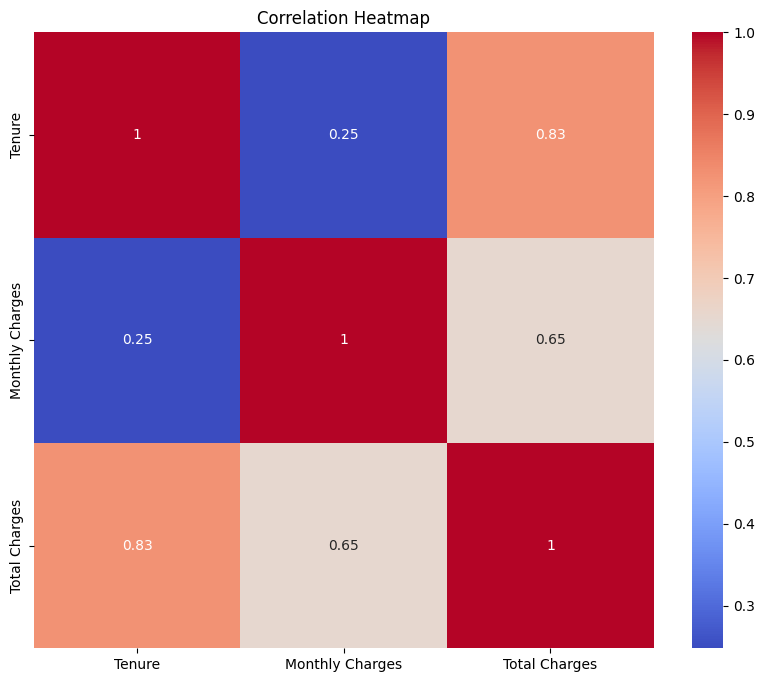

In [ ]:
#Correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(df[['Tenure', 'Monthly Charges', 'Total Charges']].corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Heatmap')
plt.show()

Categorical Feature Analysis

In [ ]:
df.columns

Index(['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Partner            7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   Tenure             7043 non-null   int64  
 4   Phone Service      7043 non-null   object 
 5   Multiple Lines     7043 non-null   object 
 6   Internet Service   7043 non-null   object 
 7   Online Security    7043 non-null   object 
 8   Online Backup      7043 non-null   object 
 9   Device Protection  7043 non-null   object 
 10  Tech Support       7043 non-null   object 
 11  Streaming TV       7043 non-null   object 
 12  Streaming Movies   7043 non-null   object 
 13  Contract           7043 non-null   object 
 14  Paperless Billing  7043 non-null   object 
 15  Payment Method     7043 non-null   object 
 16  Monthly Charges    7043 

Countplot for categorica; columns

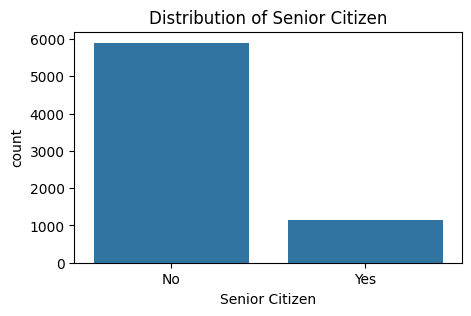

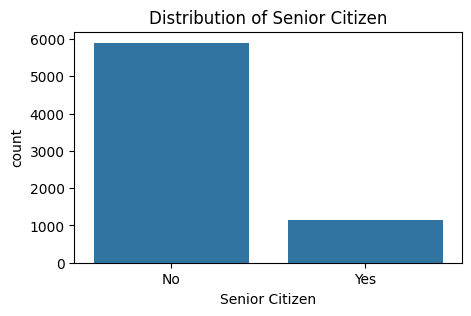

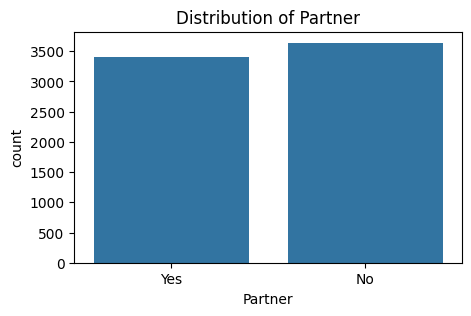

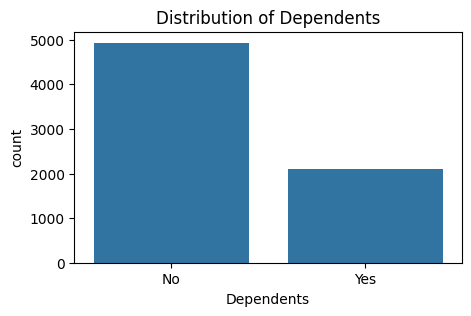

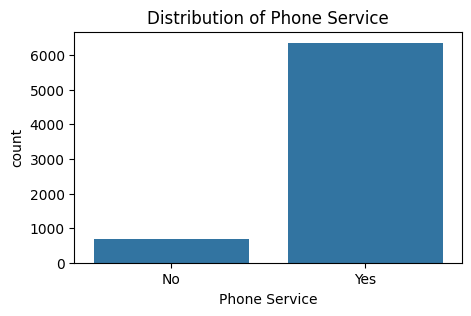

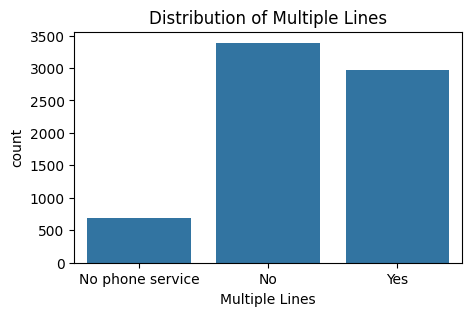

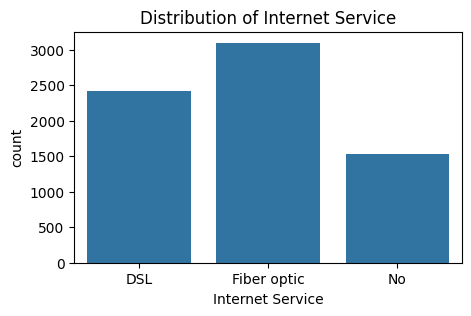

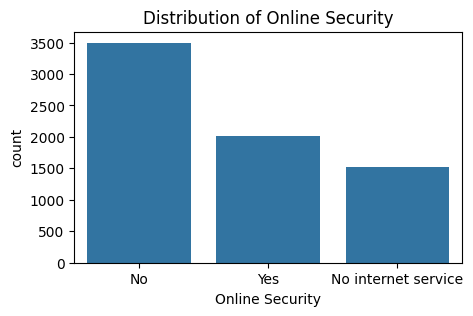

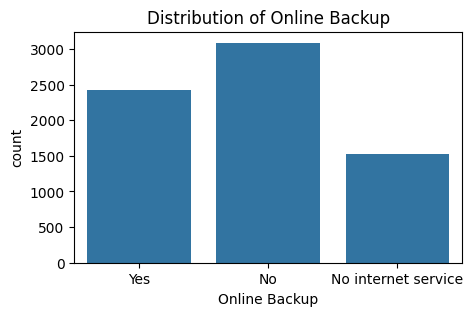

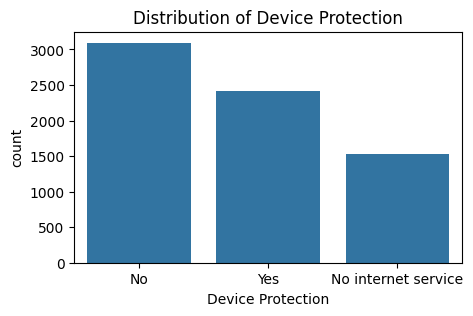

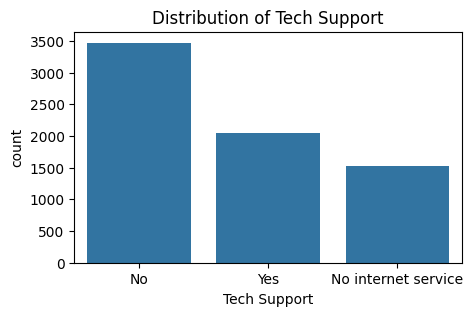

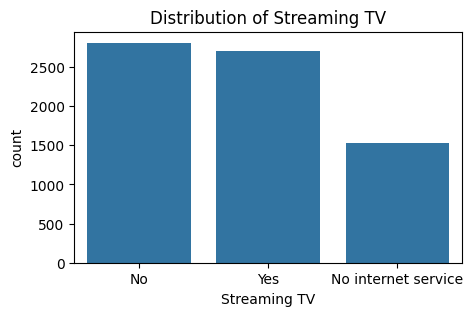

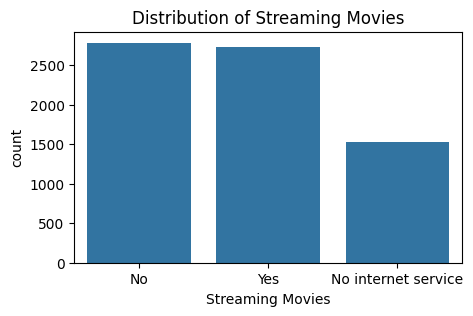

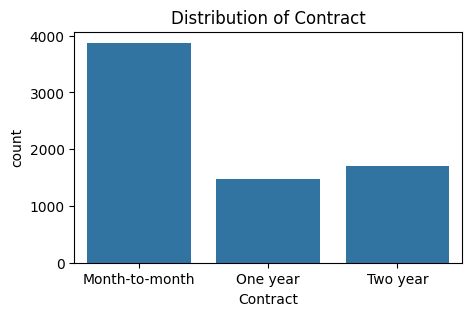

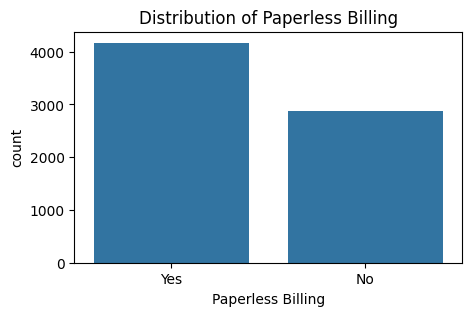

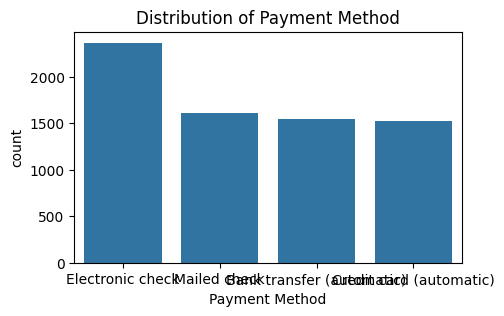

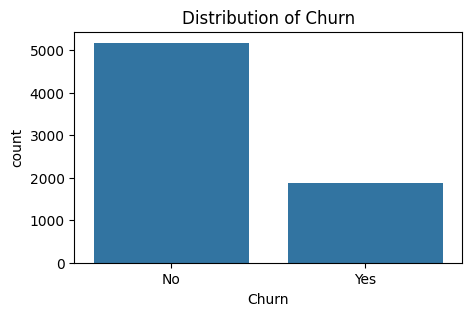

In [ ]:
object_cols = df.select_dtypes(include='object').columns.to_list()
object_cols = ['Senior Citizen'] + object_cols

for col in object_cols:
  plt.figure(figsize=(5,3))
  sns.countplot(x=df[col])
  plt.title(f'Distribution of {col}')
  plt.show()

Data Preprocessing

In [ ]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Label Encoding of target column

In [ ]:
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})

<ipython-input-45-e3b54d8eaef3>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1})


In [ ]:
df.head(2)

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0


In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


Label Encoding of Categorical Features

In [ ]:
object_columns = df.select_dtypes(include='object').columns

In [ ]:
print(object_columns)

Index(['Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method'],
      dtype='object')


In [ ]:
#Initialize a dictionary to save the encoders
encoders = {}

for column in object_columns:
  label_encoder = LabelEncoder()
  df[column] = label_encoder.fit_transform(df[column])
  encoders[column] = label_encoder

  #save the encoder to a pickle file
  with open(f'{column}_encoder.pkl', 'wb') as f:
    pickle.dump(encoders, f)

In [ ]:
encoders

{'Senior Citizen': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'Phone Service': LabelEncoder(),
 'Multiple Lines': LabelEncoder(),
 'Internet Service': LabelEncoder(),
 'Online Security': LabelEncoder(),
 'Online Backup': LabelEncoder(),
 'Device Protection': LabelEncoder(),
 'Tech Support': LabelEncoder(),
 'Streaming TV': LabelEncoder(),
 'Streaming Movies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'Paperless Billing': LabelEncoder(),
 'Payment Method': LabelEncoder()}

In [ ]:
df.head()

,Senior Citizen,Partner,Dependents,Tenure,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


Training and Test data split

In [ ]:
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(5634, 18)
(1409, 18)
(5634,)
(1409,)


In [ ]:
print(y_train.value_counts())
print(y_test.value_counts())

Churn
0    4138
1    1496
Name: count, dtype: int64
Churn
0    1036
1     373
Name: count, dtype: int64


Synthetic Minority Oversampling Technique (SMOTE)

In [ ]:
smote = SMOTE(random_state=42)

In [ ]:
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [ ]:
print(X_train_smote.shape)
print(y_train_smote.shape)

(8276, 18)
(8276,)


In [ ]:
print(y_train_smote.value_counts())

Churn
0    4138
1    4138
Name: count, dtype: int64


Model Training

In [ ]:
#Training with default hyperparameters

In [ ]:
#dictionary of models
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [ ]:
#dictionary to store the cross validation rsults
cv_scores = {}

#Perform 5 fold cross validation for each model
for model_name, model in models.items():
  print(f'Training {model_name} with default parameters')
  scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring = 'accuracy')
  cv_scores[model_name] = scores
  print(f'{model_name} accuracy: {scores.mean()}')
  print('-'*70)


Training Decision Tree with default parameters
Decision Tree accuracy: 0.7849332282499233
----------------------------------------------------------------------
Training Random Forest with default parameters
Random Forest accuracy: 0.8384618415867596
----------------------------------------------------------------------


In [ ]:
cv_scores

{'Decision Tree': array([0.67753623, 0.71661631, 0.83323263, 0.84410876, 0.85317221]),
 'Random Forest': array([0.72826087, 0.76797583, 0.90151057, 0.88942598, 0.90513595])}

Random Forest gives the highest accuracy compared to other models

In [ ]:
rfc = RandomForestClassifier(random_state=42)

In [ ]:
rfc.fit(X_train_smote, y_train_smote)

RandomForestClassifier(random_state=42)

In [ ]:
print(y_test.value_counts())

Churn
0    1036
1     373
Name: count, dtype: int64


Model Evaluation

In [ ]:
y_test_pred = rfc.predict(X_test)
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

0.7757274662881476
[[881 155]
 [161 212]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1036
           1       0.58      0.57      0.57       373

    accuracy                           0.78      1409
   macro avg       0.71      0.71      0.71      1409
weighted avg       0.77      0.78      0.78      1409



In [ ]:
#Save the model as pickle file
model_data = {'model': rfc, 'feature_names':X.columns.tolist()}
with open('model.pkl', 'wb') as f:
  pickle.dump(model_data, f)

Load the saved model and build a Predictive System

In [ ]:
with open('model.pkl', 'rb') as f:
  model_data = pickle.load(f)
  model = model_data['model']
  feature_names = model_data['feature_names']

In [ ]:
print(model)

RandomForestClassifier(random_state=42)


In [ ]:
print(feature_names)

['Senior Citizen', 'Partner', 'Dependents', 'Tenure', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges', 'Total Charges']


In [ ]:
input_data = {
    'Senior Citizen': 0,
    'Partner': 0,
    'Dependents': 0,
    'Tenure': 24,
    'Phone Service': 1,
    'Multiple Lines': 0,
    'Internet Service': 1,
    'Online Security': 0,
    'Online Backup': 0,
    'Device Protection': 1,
    'Tech Support': 0,
    'Streaming TV': 1,
    'Streaming Movies': 0,
    'Contract': 1,
    'Paperless Billing': 0,
    'Payment Method': 1,
    'Monthly Charges': 100,
    'Total Charges': 1

}

input_data_df = pd.DataFrame([input_data])

with open('model.pkl', 'rb') as f:
  model_data = pickle.load(f)  # Load the model data
  encoders = model_data.get('encoders', {})  # Get encoders, if present

  # Encode categorical features using the saved encoders
  for column, encode in encoders.items():
    # Use encode (from the loop) instead of encoder
    input_data_df[column] = encode.transform(input_data_df[column])

  # Make a Prediction
  model = model_data['model']
  prediction = model.predict(input_data_df)
  pred_prob = model.predict_proba(input_data_df)

  print(prediction)
  print(pred_prob)

  if prediction[0] == 0:
    print('Customer will not churn')
  elif prediction[0] == 1:
    print('Customer will churn')
  else:
    print('Invalid prediction')

[1]
[[0.49 0.51]]
Customer will churn


In [ ]:
encoders

{}